In [1]:
import graphlab

In [2]:
data = graphlab.SFrame('mob.csv')

This non-commercial license of GraphLab Create for academic use is assigned to 23imak@gmail.com and will expire on August 16, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1482866875.log


Finished parsing file /home/maverick/Data Science/mob.csv

Parsing completed. Parsed 100 lines in 0.15131 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/maverick/Data Science/mob.csv

Parsing completed. Parsed 179 lines in 0.118134 secs.

In [6]:
print data

+----------+------------------+------+----------------------+
| sessions | avg_session_time | damu | max_usage_per_minute |
+----------+------------------+------+----------------------+
|   2609   |  308.309313913   | 3528 |          27          |
|   525    |  296.975238095   | 612  |          7           |
|   426    |  331.070422535   | 582  |          7           |
|   2286   |   340.57480315   | 2915 |          29          |
|   3055   |  327.703764321   | 4053 |          28          |
|   2904   |  325.964187328   | 3941 |          28          |
|   3244   |  338.630394575   | 4154 |          40          |
|   2849   |   314.2004212    | 3776 |          29          |
|   550    |  267.296363636   | 644  |          8           |
|   476    |  312.605042017   | 606  |          7           |
+----------+------------------+------+----------------------+
[179 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more

In [7]:
graphlab.canvas.set_target('ipynb')
data.show(view = "Scatter Plot",x="sessions",y="max_usage_per_minute")

## Splitting data into train and test

In [8]:
train_data,test_data = data.random_split(.8,seed=0)

## Creating model to with only one feature (sessions)

In [9]:
model = graphlab.linear_regression.create(train_data,target='max_usage_per_minute',features=['sessions'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 142

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.036106     | 8.271806           | 4.428036             | 2.665529      | 2.732647        |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [10]:
print model.evaluate(test_data)

{'max_error': 5.943234612298475, 'rmse': 2.9283343410423415}


## Model plotted with actual data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

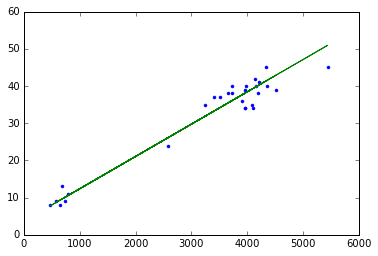

In [13]:
plt.plot(test_data['sessions'],test_data['max_usage_per_minute'],'.',
        test_data['sessions'],model.predict(test_data),'-')

In [15]:
model.get('coefficients')

name,index,value,stderr
(intercept),None,3.70109715996,0.471127322598
sessions,None,0.00867942999308,0.000148141932915


## Adding Other features

In [16]:
new_features = ['avg_session_time', 'damu']

In [18]:
data[new_features].show()

## Building a new model using new features

In [19]:
new_model = graphlab.linear_regression.create(train_data,target='max_usage_per_minute',features=new_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 144

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.007901     | 15.676104          | 4.683659             | 2.999413      | 3.203173        |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [20]:
print model.evaluate(test_data)
print new_model.evaluate(test_data)

{'max_error': 5.943234612298475, 'rmse': 2.9283343410423415}
{'max_error': 7.6157568380996565, 'rmse': 3.19562356009959}


# Applying model to data

In [31]:
first_row_data = data[data['sessions'] == 2609]   

In [32]:
first_row_data

sessions,avg_session_time,damu,max_usage_per_minute
2609,308.309313913,3528,27


In [33]:
print first_row_data['max_usage_per_minute']

[27, ... ]


## Predicting values of first row data

In [34]:
print model.predict(first_row_data)

[26.345730011907683]


In [35]:
print new_model.predict(first_row_data)

[29.157913176756395]
